# Importacion de librerias necesarias


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sbn
from sklearn import preprocessing

# Preprocesamiento y eleccion de variables

In [30]:
df=pd.read_csv('/content/cod.csv')
df

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0


Datos estadisticos del DataFrame


In [31]:
df.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


Matriz de coorelacion

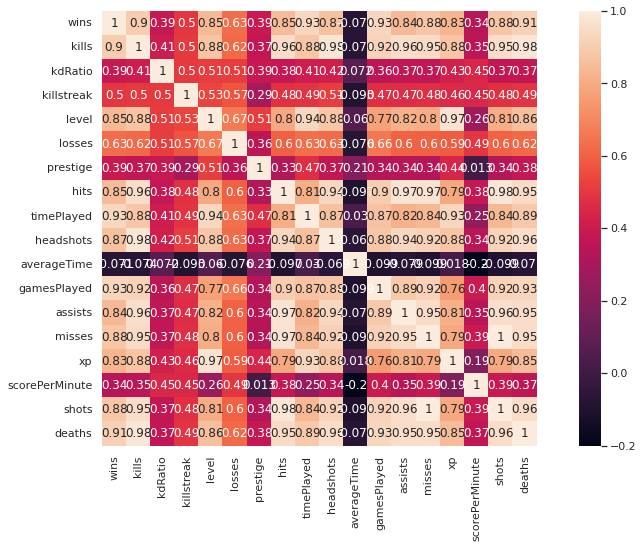

In [32]:
sbn.set(rc = {'figure.figsize':(15,8)})
sbn.heatmap(df.corr(), square=True, annot=True)

In [33]:
df = df.drop(['name', 'shots', 'level','prestige', ], axis = 1)

In [34]:
df

,wins,kills,kdRatio,killstreak,losses,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,deaths
0,0,0,0.000000,0,0,0,0,0,0.0,0,0,0,0,0.0,0
1,0,0,0.000000,0,0,0,7,0,7.0,0,0,0,700,0.0,16
2,0,66,1.031250,0,0,0,32,16,32.0,0,1,0,48300,0.0,64
3,3,2,0.400000,0,0,0,3,0,3.0,0,0,0,1150,0.0,5
4,0,2,0.200000,0,0,0,5,1,5.0,0,0,0,1000,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0,51,0.432203,0,0,0,71,11,71.0,0,0,0,49935,0.0,118
1554,0,0,0.000000,0,0,0,0,0,0.0,0,0,0,0,0.0,0
1555,0,0,0.000000,0,0,0,0,0,0.0,0,0,0,0,0.0,0
1556,0,0,0.000000,0,0,2,1,0,1.0,0,1,7,0,91.2,0


# Escalamiento y detección de outliers

In [35]:
X = df.iloc[:,:].values
X

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.0000000e+02,
        0.0000000e+00, 1.6000000e+01],
       [0.0000000e+00, 6.6000000e+01, 1.0312500e+00, ..., 4.8300000e+04,
        0.0000000e+00, 6.4000000e+01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        9.1200000e+01, 0.0000000e+00],
       [1.0000000e+00, 3.5000000e+01, 6.8627451e-01, ..., 1.7126000e+04,
        3.9000000e+01, 5.1000000e+01]])

In [36]:
N = X.shape[0] 
K = 2 

SSE = []
for i in range(0, N):
  X_sin_i = np.delete(X, i, axis=0) 
  kmeans = KMeans(n_clusters=K, n_init=10, random_state=100).fit(X_sin_i)
  SSE.append(kmeans.inertia_)

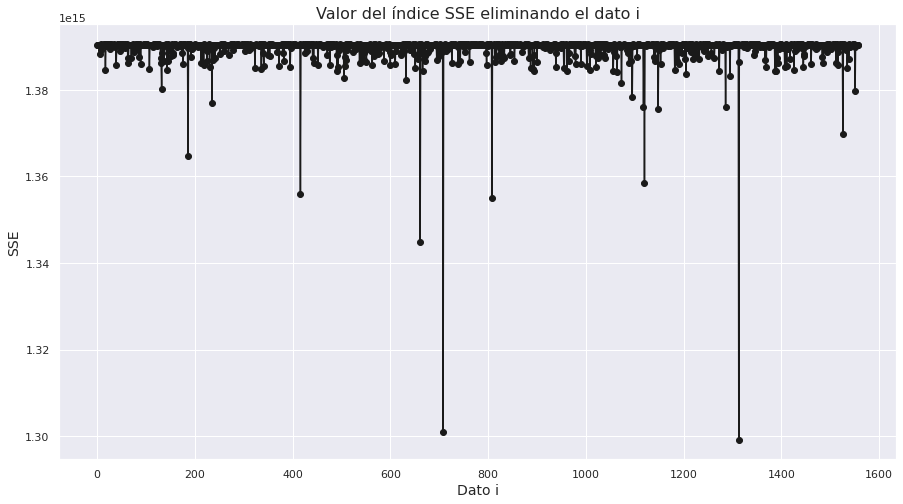

In [37]:
plt.plot(np.arange(0, N), SSE, "ko-")
plt.title("Valor del índice SSE eliminando el dato i", fontsize=16)
plt.xlabel("Dato i", fontsize=14)
plt.ylabel("SSE", fontsize=14)
plt.show()

Detectar y eliminar outliers
Almacenaremos el índice SSE de cada una de las ejecuciones en un vector. Esa
información se puede obtener con la variable inertia_ del modelo

In [38]:
sigma = np.std(SSE) 
mu = np.mean(SSE) 
umbral = 2 
outliers = []
for i in range(0, N):
  if np.abs(SSE[i]-mu) > umbral*sigma:
    outliers.append(i)
print(outliers)

[132, 186, 235, 416, 661, 708, 808, 1095, 1118, 1120, 1148, 1286, 1313, 1526, 1551]


In [39]:
X_new = np.delete(X, outliers, axis=0)
X_new.shape

(1543, 15)

# Optimizacion de la funcion BIC

In [40]:
def BIC(K, grupos, X):
  """
  K: Número de grupos (clusters)
  grupos: Vector que contiene los grupos de los datos
  X: Matriz de datos
  """
  N = X.shape[0] # Número de datos
  P = X.shape[1] # Número de variables
  xi = np.zeros((1,K)) # Vector xi

  # Calculamos el sumario de xi en la fórmula
  for k in range(0, K):
    suma = 0
    for j in range(0, P):
      sigma = np.square(np.std(X[:, j]))
      sigma_j = np.square(np.std(X[grupos==k, j]))
      suma += 0.5*np.log(sigma + sigma_j)

    n_k = sum(grupos==k) # Número de elementos en el grupo k
    xi[0, k] = -n_k*suma

  bic = -2*np.sum(xi) + 2*K*P*np.log(N)
  return bic

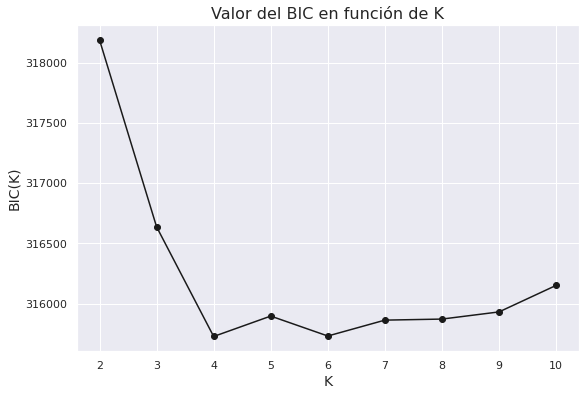

In [41]:
## Calculo del BIC
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Kmax = 10
BIC_array = []
for k in range(2, Kmax+1):
  kmeans = KMeans(n_clusters=k, n_init=15, random_state=100)
  grupos = kmeans.fit_predict(X)
  BIC_array.append(BIC(k, grupos, X))

# Dibujamos el BIC obtenido para cada valor de k
plt.figure(figsize=(9, 6))
plt.plot(np.arange(2, Kmax+1), BIC_array, "ko-")
plt.title("Valor del BIC en función de K", fontsize=16)
plt.xlabel("K", fontsize=14)
plt.ylabel("BIC(K)", fontsize=14)
plt.show()

# Ejecución de análisis cluster con un valor de k concreto (número de grupos), por ejemplo 4, y determinar el número de réplicas (n_init) del algoritmo que conduce a que la repetición de dicho algoritmo genere la misma solución.

In [27]:
kmeans = KMeans(n_clusters=4, n_init=30, random_state=100)
pred = kmeans.fit_predict(X_new)
centroides = kmeans.cluster_centers_

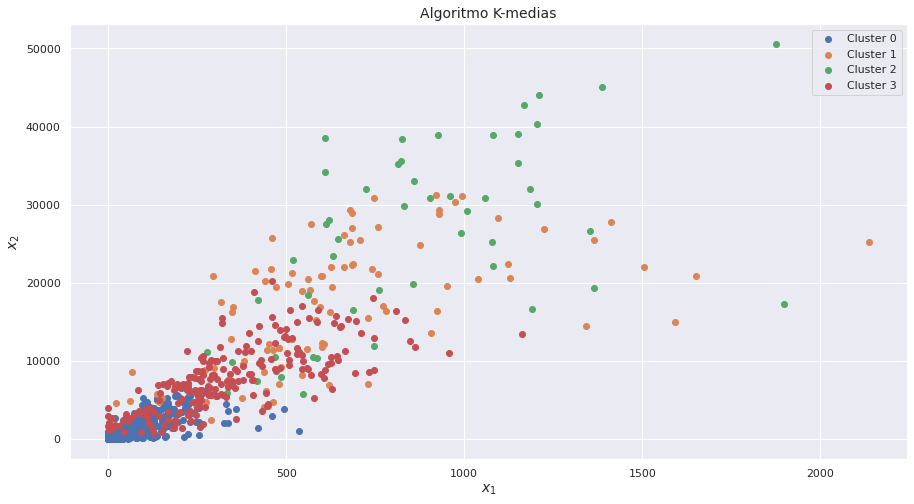

In [28]:
for k in range(0, 4):
  plt.scatter(X_new[pred==k, 0], X_new[pred==k, 1], label="Cluster {}".format(k)) 

plt.title("Algoritmo K-medias", fontsize=14)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend()
plt.show()

#Mostrar para el análisis anterior una tabla con los siguientes datos: número de grupo, cantidad de observaciones de ese grupo y el centroide que representa a ese grupo(valor de cada variable)

In [42]:
df.columns

Index(['wins', 'kills', 'kdRatio', 'killstreak', 'losses', 'hits',
       'timePlayed', 'headshots', 'averageTime', 'gamesPlayed', 'assists',
       'misses', 'xp', 'scorePerMinute', 'deaths'],
      dtype='object')

In [43]:
centroides

array([[3.04804422e+01, 5.43112245e+02, 5.23702620e-01, 3.88605442e+00,
        2.45918367e+00, 1.68159609e+03, 8.14693878e+01, 9.35153061e+01,
        1.77804559e+01, 2.04319728e+01, 1.08977891e+02, 7.74226446e+03,
        1.19010213e+05, 8.97159886e+01, 6.32769558e+02],
       [6.38979592e+02, 1.66737347e+04, 9.92663763e-01, 1.86122449e+01,
        1.34693878e+01, 4.46614592e+04, 1.79625510e+03, 2.72639796e+03,
        1.50642378e+01, 4.99683673e+02, 3.08273469e+03, 1.94906337e+05,
        3.84129037e+06, 1.58777449e+02, 1.71278571e+04],
       [8.72560000e+02, 2.60136000e+04, 1.04452312e+00, 1.73200000e+01,
        1.64600000e+01, 6.70845200e+04, 2.67322000e+03, 4.29426000e+03,
        8.30912432e+00, 6.75320000e+02, 4.64992000e+03, 2.88536080e+05,
        6.69248098e+06, 1.44678800e+02, 2.57830200e+04],
       [3.41187215e+02, 7.74760274e+03, 9.54606322e-01, 1.45890411e+01,
        1.14703196e+01, 2.22365342e+04, 9.00789954e+02, 1.36080822e+03,
        4.78053161e+01, 2.63534247e+0

In [44]:
tabla = pd.DataFrame()
grupos = np.bincount(pred)

for k in range(4):
  tabla.loc[k, 'Grupos'] = k
  tabla.loc[k, "Numero Observaciones"] = grupos[k]
  tabla.loc[k,'wins'] = centroides[k,0]
  tabla.loc[k,'kills'] = centroides[k,1]
  tabla.loc[k,'kdRatio'] = centroides[k,2]
  tabla.loc[k,'killstreak '] = centroides[k,3]
  tabla.loc[k,'losses '] = centroides[k,4]
  tabla.loc[k,'hits '] = centroides[k,5]
  tabla.loc[k,'timePlayed '] = centroides[k,6]
  tabla.loc[k,'headshots '] = centroides[k,7]
  tabla.loc[k,'averageTime '] = centroides[k,8]  
  tabla.loc[k,'gamesPlayed '] = centroides[k,9]  
  tabla.loc[k,'assists '] = centroides[k,10]  
  tabla.loc[k,'misses '] = centroides[k,11]  
  tabla.loc[k,'xp '] = centroides[k,12]  
  tabla.loc[k,'scorePerMinute '] = centroides[k,13]  
  tabla.loc[k,'deaths '] = centroides[k,14]  
tabla


,Grupos,Numero Observaciones,wins,kills,kdRatio,killstreak,losses,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,deaths
0,0.0,1176.0,30.480442,543.112245,0.523703,3.886054,2.459184,1681.596088,81.469388,93.515306,17.780456,20.431973,108.977891,7742.264456,1.190102e+05,89.715989,632.769558
1,1.0,98.0,638.979592,16673.734694,0.992664,18.612245,13.469388,44661.459184,1796.255102,2726.397959,15.064238,499.683673,3082.734694,194906.336735,3.841290e+06,158.777449,17127.857143
2,2.0,50.0,872.560000,26013.600000,1.044523,17.320000,16.460000,67084.520000,2673.220000,4294.260000,8.309124,675.320000,4649.920000,288536.080000,6.692481e+06,144.678800,25783.020000
3,3.0,219.0,341.187215,7747.602740,0.954606,14.589041,11.470320,22236.534247,900.789954,1360.808219,47.805316,263.534247,1400.712329,99424.917808,1.593950e+06,171.285505,8162.940639
